# Metamodels on SER dataset

## Goal

This notebook describes a dataset of EM signatures which can be used to train and compare different metamodels 

## Import modules and data

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We start by importing data, they are stocked in a .csv file with a ; separator - data are already normalized.
**2 options, choose the good one**

**To read files from google colab**

url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled.csv'

xy_tot = pd.read_csv(url_name, header=0,sep=';')

In [5]:
url_name='https://raw.githubusercontent.com/dbetteb/early-ML/master/08_CAS_TEST_SER/data_scaled.csv'
xy_tot = pd.read_csv(url_name, header=0,sep=';')

**If you are on your computer**

In [ ]:
file_name="data_scaled.csv"
xy_tot=pd.read_csv(file_name,header=0,sep=';')
xy_tot.describe()

,Logive,Rnez,Lfente,Pfente,Dengin,LBB,Pos,Fleche_BA,Fleche_BF,Corde,H,y
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,1.110000e+02
mean,0.497335,0.499360,0.498114,0.500438,0.497902,0.502162,0.496423,0.503372,0.500216,0.500145,0.503438,1.801801e-11
std,0.291364,0.294132,0.291572,0.290533,0.293118,0.290416,0.292513,0.290781,0.293343,0.290855,0.290823,1.000000e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.144837e+00
25%,0.249340,0.248046,0.251255,0.254569,0.245518,0.259067,0.244946,0.257116,0.250675,0.255086,0.258540,-7.387808e-01
50%,0.495338,0.501609,0.497895,0.500335,0.498257,0.501992,0.497005,0.503145,0.500258,0.500010,0.504185,1.914246e-02
75%,0.742680,0.750742,0.749488,0.748856,0.749841,0.745628,0.745938,0.750699,0.751053,0.744964,0.751018,7.946404e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.625505e+00


Visualization

In [6]:
print(xy_tot)

       Logive      Rnez    Lfente    Pfente    Dengin       LBB       Pos  \
0    0.495338  0.000000  0.497895  0.500335  0.498257  0.501992  0.000000   
1    0.839713  0.797224  0.544219  0.117688  0.386605  0.936888  0.859441   
2    0.718764  0.462412  0.122786  0.000000  0.148126  0.284999  0.572958   
3    0.232614  0.964583  0.208857  0.493698  0.087776  0.514571  0.915970   
4    0.328525  0.360263  0.771815  0.737518  0.032510  0.805642  0.444953   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.893357  0.616894  0.666424  0.040633  0.112727  0.749508  0.408983   
107  0.954314  0.544326  0.619205  0.588434  0.649281  0.113298  0.877323   
108  0.673615  0.753639  0.953679  0.019827  0.826220  0.468277  0.894760   
109  0.655463  0.940585  0.931341  0.540705  0.040912  0.268522  0.286047   
110  0.018758  0.603489  0.405507  0.007256  0.637778  0.919163  0.230755   

     Fleche_BA  Fleche_BF     Corde         H         y  
0     0.503145   

Data shape

In [7]:
xy_tot.shape

(111, 12)

## Metamodels

**Linear regression model**

We split inputs and output y

In [8]:
y_tot= xy_tot.pop('y')

In [9]:
y_tot.shape

(111,)

In [10]:
xy_tot.shape

(111, 11)

In [11]:
import sklearn.linear_model as lm
linreg = lm.LinearRegression()

In [12]:
lr=linreg.fit(xy_tot, y_tot)

In [13]:
lr.coef_

array([ 0.63524533,  0.0801131 ,  0.0473146 , -0.03260559, -0.22678993,
        2.36752092, -0.26686172, -0.8631107 ,  0.28595473,  1.0495401 ,
        1.7477699 ])

In [14]:
linreg.score(xy_tot,y_tot)

0.9469383113421452

Plot with matplotlib

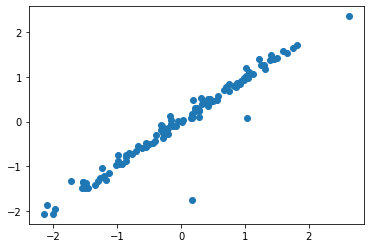

In [15]:
plt.plot(y_tot,lr.predict(xy_tot),'o')

**MLP metamodel SKLEARN**

We split into training and test data (20%)

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train, x_test, y_train, y_test = train_test_split(xy_tot, y_tot, test_size=0.1)

In [18]:
from sklearn.neural_network import MLPRegressor

In [19]:
nnet=MLPRegressor(hidden_layer_sizes=(10,),max_iter=10000,activation='tanh',alpha=0.05,solver='lbfgs')

In [20]:
nnet.fit(x_train,y_train)

MLPRegressor(activation='tanh', alpha=0.05, hidden_layer_sizes=(10,),
             max_iter=10000, solver='lbfgs')

In [21]:
y_pred=nnet.predict(x_test)

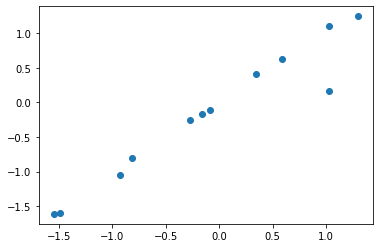

In [22]:
plt.plot(y_test, y_pred,'o')

Estimation of determination coefficient R2

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test,y_pred)

0.9228414370311799

**Exercise** : Try other metamodels